# Clothing Classification Using TensorFlow

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

<div style="text-align: center;">

![clothes](img1/cloths.png)
</div>

### Packages
Following packages are used.

In [267]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images.

Each image is associated with a label as shown in this table

<div style="text-align: center;">

![Table](img1/table.png)
</div>

In [268]:
# load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [269]:
# load the training set 
(x_train, y_train), (x_test, y_test) = fmnist.load_data() 

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 

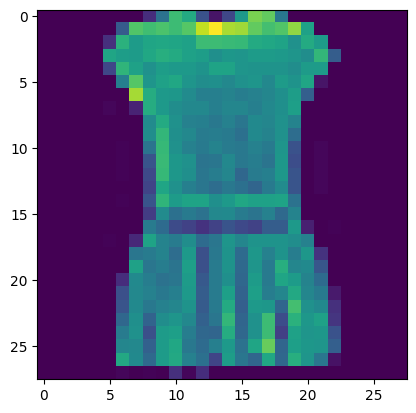

In [270]:
# can put between 0 to 69999
index = 3

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

# Visualize the image
plt.imshow(x_train[index])


### Normalizaing Data

 The images are normalized to have pixel values in the range [0, 1], and the labels are one-hot encoded.

In [271]:
# normalizating the data
x_train = x_train / 255.0
x_test = x_test / 255.0

### Creating a Callback class

In [272]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the accuracy cross 95
    
    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''
    
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

### Building and Compiling  the Model

This neural network consists of three layers:

    Input Layer (512 Neurons): Accepts input data features.
    Hidden Layer (128 Neurons, ReLU): Extracts complex patterns using the ReLU activation function.
    Output Layer (10 Neurons, Softmax): Generates class probabilities for classification.

The architecture is optimized for classification tasks, effectively learning and predicting patterns in the input data

In [273]:
# Build the classification model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation=tf.nn.relu), 
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ],name="Car_Model"     
)

In [274]:
model.compile(
    optimizer="adam",
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [275]:
model.fit(x_train, y_train, epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4736 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3585 - accuracy: 0.8675
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3218 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2985 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2801 - accuracy: 0.8952


In [276]:
# Evaluate the model on unseen data
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"loss: {loss * 100:.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8685
Test Accuracy: 86.85%
loss: 35.53


## Prediction on Test set

313/313 [==============================] - 1s 2ms/step


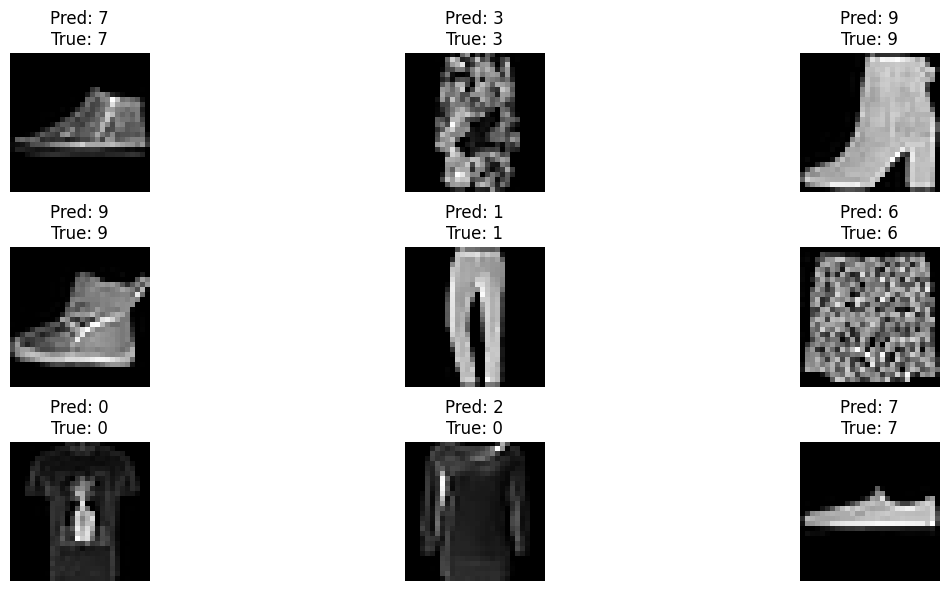

In [284]:
# Get predictions on the test set
predictions = model.predict(x_test)

# Display images along with their predictions and actual values
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    random_index = np.random.randint(len(x_test))
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    plt.axis('off')
    predicted_label = np.argmax(predictions[random_index])
    true_label = y_test[random_index]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')

plt.tight_layout()
plt.show()
